# Distance between points
<hr style="border:0.01px solid gray"> </hr>

**Author**: Maryann Vazhapilly (marvaz@umd.edu)

**Description**: The purpose of this notebook is to test the spatial auto-corrleation between different locations in the Togo dataset. This includes assessing how far away different points are from each other on average, and also within the training and test sets. Distance metrics collected also reflect the average distance(mean), min, and max.

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [13]:
# Import dataset --> this example uses Togo.csv
df = pd.read_csv("/Users/spiderman/Downloads/GitHub/crop-mask/data/processed/Togo.csv")

In [14]:
df.head(10)

,lon,lat,start_date,end_date,source,crop_probability,num_labelers,subset,country,dataset,dest_tif,filename
0,-0.166017,11.161904,2019-04-22,2020-04-16,noncrop_merged_v2,0.0,1,training,Togo,Togo,noncrop_merged_v2/0_2019-04-22_2020-04-16.tif,lat=11.16190392_lon=-0.1660175_date=2019-04-22...
1,-0.163856,11.163926,2019-04-22,2020-04-16,crop_merged_v2,1.0,1,training,Togo,Togo,crop_merged_v2/1_2019-04-22_2020-04-16.tif,lat=11.16392591_lon=-0.16385638_date=2019-04-2...
2,-0.157025,11.136826,2019-04-22,2020-04-16,noncrop_merged_v2,0.0,1,training,Togo,Togo,noncrop_merged_v2/2_2019-04-22_2020-04-16.tif,lat=11.13682622_lon=-0.15702498_date=2019-04-2...
3,-0.155683,11.159340,2019-04-22,2020-04-16,crop_merged_v2,1.0,1,training,Togo,Togo,crop_merged_v2/3_2019-04-22_2020-04-16.tif,lat=11.1593399_lon=-0.15568345_date=2019-04-22...
4,-0.155525,11.136067,2019-04-22,2020-04-16,noncrop_merged_v2,0.0,1,training,Togo,Togo,noncrop_merged_v2/4_2019-04-22_2020-04-16.tif,lat=11.13606681_lon=-0.15552516_date=2019-04-2...
5,-0.154908,11.136198,2019-04-22,2020-04-16,crop_merged_v2,1.0,1,training,Togo,Togo,crop_merged_v2/5_2019-04-22_2020-04-16.tif,lat=11.13619805_lon=-0.15490834_date=2019-04-2...
6,-0.154001,11.136584,2019-04-22,2020-04-16,crop_merged_v2,1.0,1,training,Togo,Togo,crop_merged_v2/6_2019-04-22_2020-04-16.tif,lat=11.13658379_lon=-0.15400141_date=2019-04-2...
7,-0.142175,11.127015,2019-04-22,2020-04-16,noncrop_merged_v2,0.0,1,training,Togo,Togo,noncrop_merged_v2/7_2019-04-22_2020-04-16.tif,lat=11.12701457_lon=-0.14217493_date=2019-04-2...
8,-0.139218,11.133168,2019-04-22,2020-04-16,noncrop_merged_v2,0.0,1,validation,Togo,Togo,noncrop_merged_v2/8_2019-04-22_2020-04-16.tif,lat=11.13316826_lon=-0.13921799_date=2019-04-2...
9,-0.132295,11.125922,2019-04-22,2020-04-16,noncrop_merged_v2,0.0,1,validation,Togo,Togo,noncrop_merged_v2/9_2019-04-22_2020-04-16.tif,lat=11.12592151_lon=-0.13229529_date=2019-04-2...


In [15]:
# Isolate the lon, lat, and subset columns
df = df[['lon','lat','subset']]
# Group the data by the associated subset - training or validation
grouped = df.groupby(df.subset)

In [16]:
# Create the train set by getting the training group
# Create the test set by getting the test group
# Create the val set by getting the validation group
train = grouped.get_group("training")
test = grouped.get_group("testing")
val = grouped.get_group("validation")
# Drop the subset column b/c the data is already grouped now
train = train.drop(['subset'], axis=1)
test = test.drop(['subset'], axis=1)
val = val.drop(['subset'], axis=1)

In [17]:
train.describe()

,lon,lat
count,999.000000,999.000000
mean,0.965939,8.948017
std,0.545832,1.555376
min,-0.166017,6.219475
25%,0.532095,7.503816
50%,1.134147,9.006904
75%,1.409445,10.603915
max,1.744784,11.163926


In [18]:
test.describe()

,lon,lat
count,355.000000,355.000000
mean,0.986390,8.461401
std,0.367095,1.300279
min,-0.011731,6.163283
25%,0.712120,7.390088
50%,0.992461,8.554501
75%,1.305416,9.466591
max,1.758173,11.049433


In [19]:
val.describe()

,lon,lat
count,277.000000,277.000000
mean,0.912382,9.003764
std,0.548913,1.594306
min,-0.139218,6.221596
25%,0.454662,7.528455
50%,1.062726,9.154662
75%,1.383338,10.719697
max,1.682789,11.133168


In [20]:
# Function to calculate distance
# https://gist.github.com/rochacbruno/2883505
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [21]:
# Function to caluculate average, min, and max distance
def distance_metrics(dataframe1, dataframe2):
    total_sum = 0
    min_distance = math.inf
    max_distance = 0
    current_distance = 0
    distances = []
    for row in dataframe1.itertuples():
        for row2 in dataframe2.itertuples():
            current_distance = distance((row.lat, row.lon),(row2.lat, row2.lon))
            total_sum += current_distance
            distances.append(current_distance)
            if current_distance < min_distance and not (row.lat == row2.lat and row.lon == row2.lon):
                min_distance = current_distance
            if current_distance > max_distance:
                max_distance = current_distance
    avg_distance = total_sum / (len(dataframe1)*len(dataframe2))
    print("Average distance: ", avg_distance)
    print("Minimum distance: ", min_distance)
    print("Maximum distance: ", max_distance)
    return distances

In [22]:
# Display average, min, and max distance of training set points
train_arr = distance_metrics(train, train)

Average distance:  215.45258998228815
Minimum distance:  0.02357211575617554
Maximum distance:  581.9591011484724


Text(0.5, 1.0, 'Distance Distribution')

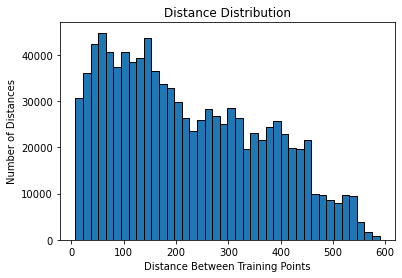

In [23]:
# Display histogram for training set points
plt.hist(train_arr, bins = 40, align='right', edgecolor='black')
plt.xlabel('Distance Between Training Points')
plt.ylabel('Number of Distances')
plt.title('Distance Distribution')

In [24]:
# Display average, min, and max distance of test set points
test_arr = distance_metrics(test, test)

Average distance:  178.63520579906017
Minimum distance:  0.24561843058561303
Maximum distance:  559.3126878530702


Text(0.5, 1.0, 'Distance Distribution')

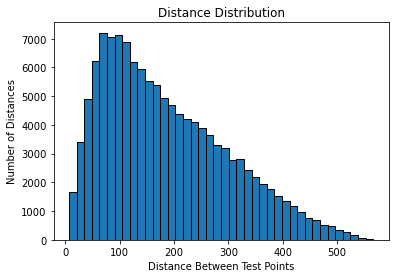

In [25]:
# Display histogram for test set points
plt.hist(test_arr, bins = 40, align='right', edgecolor='black')
plt.xlabel('Distance Between Test Points')
plt.ylabel('Number of Distances')
plt.title('Distance Distribution')

In [26]:
# Display average, min, and max distance of validation set points
val_arr = distance_metrics(val, val)

Average distance:  219.40271154984913
Minimum distance:  0.03737098178074144
Maximum distance:  571.628431172596


Text(0.5, 1.0, 'Distance Distribution')

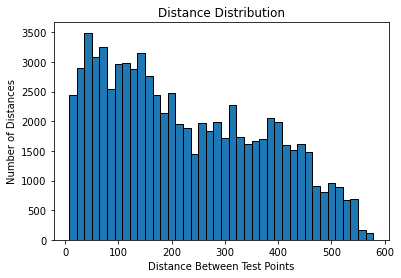

In [27]:
# Display histogram for validation set points
plt.hist(val_arr, bins = 40, align='right', edgecolor='black')
plt.xlabel('Distance Between Test Points')
plt.ylabel('Number of Distances')
plt.title('Distance Distribution')

In [39]:
# Display average, min, and max distance of train and val set points
train_and_val_arr = distance_metrics(train, val)

Average distance:  217.68491174174483
Minimum distance:  0.0026029899987407294
Maximum distance:  577.8031902540911


Text(0.5, 1.0, 'Distance Distribution')

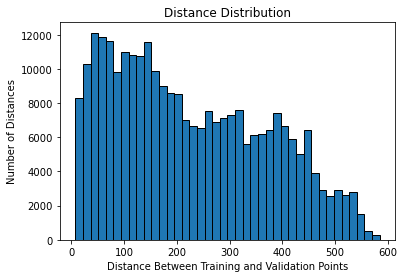

In [40]:
# Display histogram for train and val set points
plt.hist(train_and_val_arr, bins = 40, align='right', edgecolor='black')
plt.xlabel('Distance Between Training and Validation Points')
plt.ylabel('Number of Distances')
plt.title('Distance Distribution')

In [41]:
# Display average, min, and max distance of test and val set points
test_and_val_arr = distance_metrics(test, val)

Average distance:  209.63101103043206
Minimum distance:  0.1539869146381993
Maximum distance:  576.4471273762247


Text(0.5, 1.0, 'Distance Distribution')

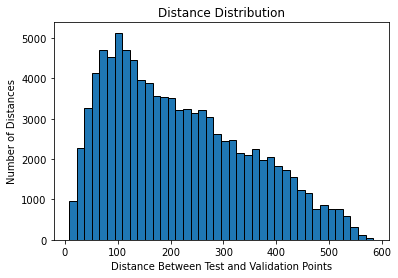

In [42]:
# Display histogram for test and val set points
plt.hist(test_and_val_arr, bins = 40, align='right', edgecolor='black')
plt.xlabel('Distance Between Test and Validation Points')
plt.ylabel('Number of Distances')
plt.title('Distance Distribution')

In [45]:
# Display average, min, and max distance of train and test set points
train_and_test_arr = distance_metrics(train, test)

Average distance:  205.6835877683412
Minimum distance:  0.04651670988860487
Maximum distance:  580.6127276775093


Text(0.5, 1.0, 'Distance Distribution')

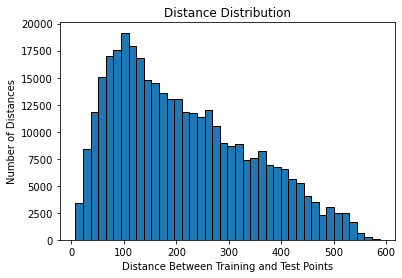

In [44]:
# Display histogram for train and test set points
plt.hist(train_and_test_arr, bins = 40, align='right', edgecolor='black')
plt.xlabel('Distance Between Training and Test Points')
plt.ylabel('Number of Distances')
plt.title('Distance Distribution')